In [2]:
# Setup.
import pandas as pd
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools 
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib


In [3]:
def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/qualifying.json'.format(year, season_number)
    data = requests.get(api).json()
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('QualifyingResults'))
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

qualifying = pd.concat(results, axis=0)
qualifying['driver_id'] = qualifying.Driver.map(lambda x: x.get('driverId'))
qualifying['car_make'] = qualifying.Constructor.map(lambda x: x.get('name'))
qualifying['driver_nat'] = qualifying.Driver.map(lambda x: x.get('nationality'))

qualifying.head()

,Constructor,Driver,Q1,Q2,Q3,number,position,seasonNbr,year,driver_id,car_make,driver_nat
0,"{'constructorId': 'ferrari', 'url': 'http://en...","{'driverId': 'michael_schumacher', 'code': 'MS...",1:27.173,NaN,NaN,1,1,1,2003,michael_schumacher,Ferrari,German
1,"{'constructorId': 'ferrari', 'url': 'http://en...","{'driverId': 'barrichello', 'code': 'BAR', 'ur...",1:27.418,NaN,NaN,2,2,1,2003,barrichello,Ferrari,Brazilian
2,"{'constructorId': 'williams', 'url': 'http://e...","{'driverId': 'montoya', 'code': 'MON', 'url': ...",1:28.101,NaN,NaN,3,3,1,2003,montoya,Williams,Colombian
3,"{'constructorId': 'sauber', 'url': 'http://en....","{'driverId': 'frentzen', 'url': 'http://en.wik...",1:28.274,NaN,NaN,10,4,1,2003,frentzen,Sauber,German
4,"{'constructorId': 'toyota', 'url': 'http://en....","{'driverId': 'panis', 'url': 'http://en.wikipe...",1:28.288,NaN,NaN,20,5,1,2003,panis,Toyota,French


In [4]:
api = 'http://ergast.com/api/f1/2008/5/results.json'
resp = requests.get(api).json()

def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/results.json'.format(year, season_number)
    data = requests.get(api).json()
                                         #resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('Results'))
    circuit=data.get('MRData').get('RaceTable').get('Races')[0].get('Circuit')
    temp_df['circuit_name']=circuit.get('circuitName')
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1) #2018
rounds = np.arange(1,15,1) #15

for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

out = pd.concat(results, axis=0)
out['driver_id'] = out.Driver.map(lambda x: x.get('driverId'))
out['car_make'] = out.Constructor.map(lambda x: x.get('name'))
out['driver_nat'] = out.Driver.map(lambda x: x.get('nationality'))

results = out
results['points'] = results['points'].astype(float)
results.head()

,Constructor,Driver,FastestLap,Time,circuit_name,grid,laps,number,points,position,positionText,seasonNbr,status,year,driver_id,car_make,driver_nat
0,"{'constructorId': 'mclaren', 'url': 'http://en...","{'driverId': 'coulthard', 'code': 'COU', 'url'...",NaN,"{'millis': '5682100', 'time': '1:34:42.1'}",Albert Park Grand Prix Circuit,11,58,5,10.0,1,1,1,Finished,2003,coulthard,McLaren,British
1,"{'constructorId': 'williams', 'url': 'http://e...","{'driverId': 'montoya', 'code': 'MON', 'url': ...",NaN,"{'millis': '5690775', 'time': '+8.675'}",Albert Park Grand Prix Circuit,3,58,3,8.0,2,2,1,Finished,2003,montoya,Williams,Colombian
2,"{'constructorId': 'mclaren', 'url': 'http://en...","{'driverId': 'raikkonen', 'permanentNumber': '...",NaN,"{'millis': '5691292', 'time': '+9.192'}",Albert Park Grand Prix Circuit,15,58,6,6.0,3,3,1,Finished,2003,raikkonen,McLaren,Finnish
3,"{'constructorId': 'ferrari', 'url': 'http://en...","{'driverId': 'michael_schumacher', 'code': 'MS...",NaN,"{'millis': '5691582', 'time': '+9.482'}",Albert Park Grand Prix Circuit,1,58,1,5.0,4,4,1,Finished,2003,michael_schumacher,Ferrari,German
4,"{'constructorId': 'renault', 'url': 'http://en...","{'driverId': 'trulli', 'code': 'TRU', 'url': '...",NaN,"{'millis': '5720901', 'time': '+38.801'}",Albert Park Grand Prix Circuit,12,58,7,4.0,5,5,1,Finished,2003,trulli,Renault,Italian


In [5]:
# Create combined dataframe of car make, year, position, qualifying counts and results counts.

# Summarize qualifying race results by car, year, and position.
qualifying_car_makes = qualifying.groupby(['car_make','year','position']).size().reset_index()
qualifying_car_makes.rename(columns={0:'qualifying_count'}, inplace = True)

# Summarize race results by car, year, and position.
results_car_makes = results.groupby(['car_make','year','position']).size().reset_index()
results_car_makes.rename(columns={0:'results_count'}, inplace = True)

# Combine the qualifying results counts and race results counts together.
car_make_df = pd.merge(qualifying_car_makes, results_car_makes, on = ['car_make','year','position'])
car_make_df['total_count'] = car_make_df['qualifying_count'] + car_make_df['results_count']

car_make_df.head()

,car_make,year,position,qualifying_count,results_count,total_count
0,BAR,2003,10,1,3,4
1,BAR,2003,12,4,2,6
2,BAR,2003,13,2,1,3
3,BAR,2003,14,3,1,4
4,BAR,2003,17,3,3,6


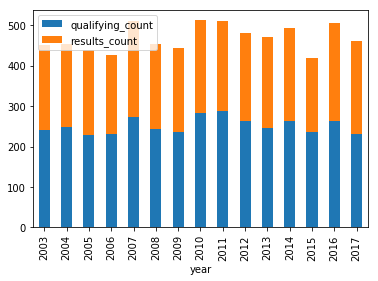

In [6]:
# Total number of positions awarded across races is between 400 and 500 every year.

x = car_make_df[['year','qualifying_count', 'results_count']]
y = x.set_index('year')
z = y.groupby('year').sum()

z.plot.bar(stacked=True)


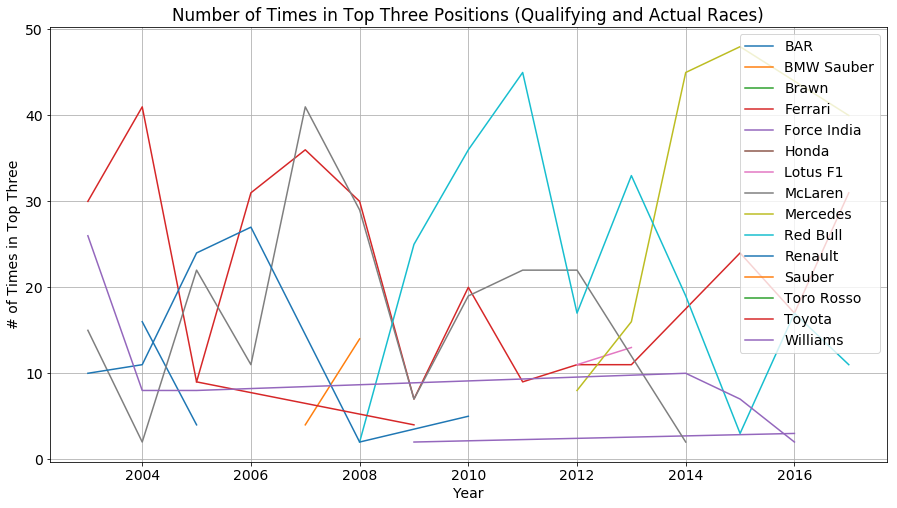

In [7]:
# car_make_df['position'].isin([1])
df = car_make_df[car_make_df['position'].isin(['1','2','3'])]
df = df[['car_make','year','total_count']].groupby(['car_make','year']).sum().reset_index()
df

matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,8))
for make in df["car_make"].unique():
    temp=df[df["car_make"]==make].sort_values("year",ascending=True)
    x=list(temp["year"])
    y=list(temp["total_count"])
    plt.plot(x,y,label=make)
plt.legend(loc=1)
plt.title("Number of Times in Top Three Positions (Qualifying and Actual Races)")
plt.xlabel('Year')
plt.ylabel('# of Times in Top Three')
plt.grid()
plt.show()


NameError: name 'df' is not defined

In [61]:
df2


def mult(row):
    return row["total_count"]*row[col]

df3 = pd.get_dummies(df2,columns=["car_make"])

for col in list(df3.columns)[2:]:
    df3[col] = df3.apply(mult,axis=1)
df3 = df3.groupby("position").count()
df3.drop(['total_count'], axis=1, inplace=True)
df3.head()

,car_make_BAR,car_make_BMW Sauber,car_make_Brawn,car_make_Caterham,car_make_Ferrari,car_make_Force India,car_make_HRT,car_make_Haas F1 Team,car_make_Honda,car_make_Jaguar,...,car_make_Minardi,car_make_Red Bull,car_make_Renault,car_make_Sauber,car_make_Spyker,car_make_Super Aguri,car_make_Toro Rosso,car_make_Toyota,car_make_Virgin,car_make_Williams
position,,,,,,,,,,,,,,,,,,,,,
1,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
2,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
3,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
4,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
5,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


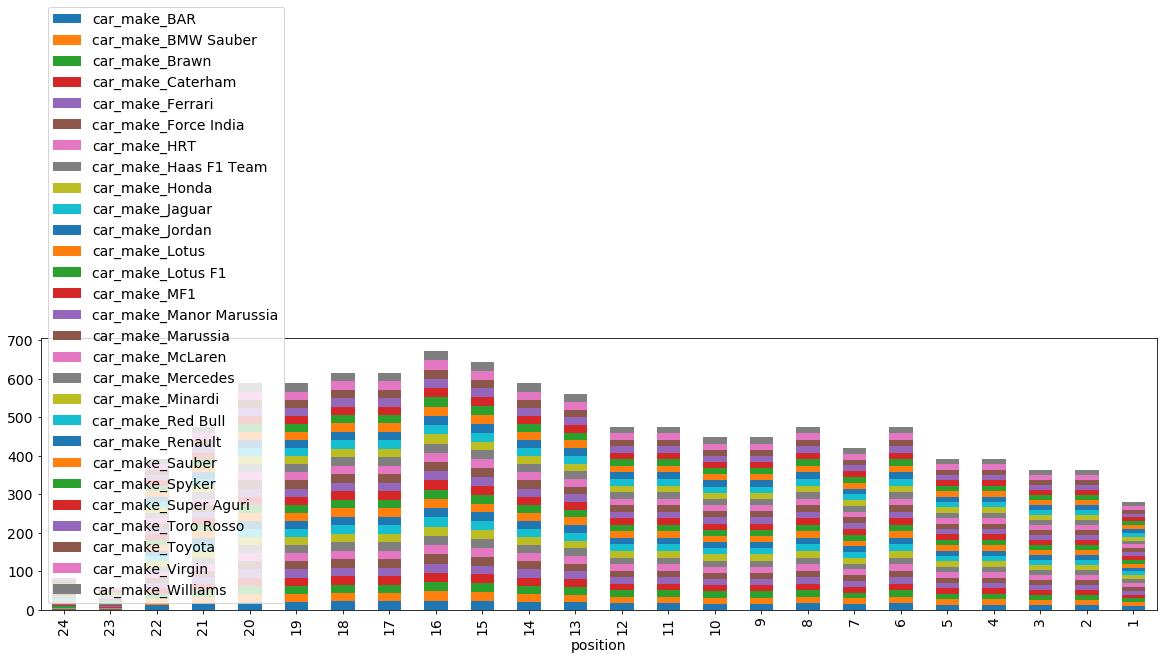

In [59]:
# neighborhood_desc = neighborhood_name.sort_values('total_crime_number', ascending=False)
# limited_desc_last_six = neighborhood_desc.set_index("NEIGHBORHOOD_ID")[-6:]
# limited_desc_last_six.columns=['drug','other','theft_burglary','traffic','violent',"total_crime_number"]
# # we had multilayer columns and then rename the columns to get selected inform we need 
# limited_desc_last_six = limited_desc_last_six[['drug','other','theft_burglary','traffic','violent']]
# # drop the totol_crime_number columns 
# limited_desc_last_six.plot.bar(stacked=True, figsize=(10,7))
# plt.title("Last 6 Neighborhoods Crime Information")
# # draw the stacked chart 
# limited_desc_last_six

df3.sort_index(ascending=False).plot.bar(stacked=True,figsize=(20,5))